In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
concepts=pd.read_csv('D_ICD_DIAGNOSES.csv')

In [3]:
proc_concepts=pd.read_csv('D_ICD_PROCEDURES.csv')

In [4]:
concepts.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [5]:
proc_concepts.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,264,851,Canthotomy,Canthotomy
1,265,852,Blepharorrhaphy,Blepharorrhaphy
2,266,859,Adjust lid position NEC,Other adjustment of lid position
3,267,861,Lid reconst w skin graft,Reconstruction of eyelid with skin flap or graft
4,268,862,Lid reconst w muc graft,Reconstruction of eyelid with mucous membrane ...


In [23]:
data_raw = pd.read_csv("./capstone/top10_multi_diag_proc")
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**top10 data:**")
data_raw.head()

Number of rows in data = 1010829
Number of columns in data = 22


**top10 data:**


,HADM_ID,TEXT,4019,4280,42731,41401,5849,25000,2724,51881,...,9904,3893,3961,9672,9604,966,9671,9955,8856,3891
0,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,167853,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,167853,PATIENT/TEST INFORMATION:\nIndication: Endocar...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,167853,Atrial fibrillation with a slow ventricular re...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [7]:
categories=list(data_raw.columns)
categories=categories[2:]

In [8]:
diag_cat=categories[0:10]

In [9]:
proc_cat=categories[10:]

In [10]:
# Filter out admission id and text columns of only top10 diagnosis
top10_concepts=concepts.loc[concepts['ICD9_CODE'].isin(diag_cat)]
top10_concepts=top10_concepts[['ICD9_CODE','LONG_TITLE']]
print(len(top10_concepts.ICD9_CODE.unique()))

10


In [11]:
# Filter out admission id and text columns of only top10 diagnosis
top10_proc_concepts=proc_concepts.loc[proc_concepts['ICD9_CODE'].isin(proc_cat)]
top10_proc_concepts=top10_proc_concepts[['ICD9_CODE','LONG_TITLE']]
top10_proc_concepts['ICD9_CODE'] = top10_proc_concepts['ICD9_CODE'].astype(str)

In [12]:
top10_proc_concepts

,ICD9_CODE,LONG_TITLE
660,3961,Extracorporeal circulation auxiliary to open h...
700,3891,Arterial catheterization
702,3893,"Venous catheterization, not elsewhere classified"
2861,8856,Coronary arteriography using two catheters
3527,9604,Insertion of endotracheal tube
3596,966,Enteral infusion of concentrated nutritional s...
3598,9671,Continuous invasive mechanical ventilation for...
3599,9672,Continuous invasive mechanical ventilation for...
3766,9904,Transfusion of packed cells
3841,9955,Prophylactic administration of vaccine against...


In [13]:
myprocdict={}
for i in range(len(top10_proc_concepts)):
    myprocdict[top10_proc_concepts.iloc[i,0]]=top10_proc_concepts.iloc[i,1]
myprocdict

{'3891': 'Arterial catheterization',
 '3893': 'Venous catheterization, not elsewhere classified',
 '3961': 'Extracorporeal circulation auxiliary to open heart surgery',
 '8856': 'Coronary arteriography using two catheters',
 '9604': 'Insertion of endotracheal tube',
 '966': 'Enteral infusion of concentrated nutritional substances',
 '9671': 'Continuous invasive mechanical ventilation for less than 96 consecutive hours',
 '9672': 'Continuous invasive mechanical ventilation for 96 consecutive hours or more',
 '9904': 'Transfusion of packed cells',
 '9955': 'Prophylactic administration of vaccine against other diseases'}

In [14]:
mydict={}
for i in range(len(top10_concepts)):
    mydict[top10_concepts.iloc[i,0]]=top10_concepts.iloc[i,1]
mydict

{'25000': 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled',
 '2724': 'Other and unspecified hyperlipidemia',
 '4019': 'Unspecified essential hypertension',
 '41401': 'Coronary atherosclerosis of native coronary artery',
 '42731': 'Atrial fibrillation',
 '4280': 'Congestive heart failure, unspecified',
 '51881': 'Acute respiratory failure',
 '53081': 'Esophageal reflux',
 '5849': 'Acute kidney failure, unspecified',
 '5990': 'Urinary tract infection, site not specified'}

In [15]:
data_raw.rename(mydict,axis=1, inplace=True)
data_raw.head(1)

,HADM_ID,TEXT,Unspecified essential hypertension,"Congestive heart failure, unspecified",Atrial fibrillation,Coronary atherosclerosis of native coronary artery,"Acute kidney failure, unspecified","Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled",Other and unspecified hyperlipidemia,Acute respiratory failure,...,9904,3893,3961,9672,9604,966,9671,9955,8856,3891
0,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [16]:
data_raw.rename(myprocdict,axis=1, inplace=True)


In [17]:
data_raw.head(1)

,HADM_ID,TEXT,Unspecified essential hypertension,"Congestive heart failure, unspecified",Atrial fibrillation,Coronary atherosclerosis of native coronary artery,"Acute kidney failure, unspecified","Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled",Other and unspecified hyperlipidemia,Acute respiratory failure,...,Transfusion of packed cells,"Venous catheterization, not elsewhere classified",Extracorporeal circulation auxiliary to open heart surgery,Continuous invasive mechanical ventilation for 96 consecutive hours or more,Insertion of endotracheal tube,Enteral infusion of concentrated nutritional substances,Continuous invasive mechanical ventilation for less than 96 consecutive hours,Prophylactic administration of vaccine against other diseases,Coronary arteriography using two catheters,Arterial catheterization
0,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [18]:
data_raw.columns[2:]

Index(['Unspecified essential hypertension',
       'Congestive heart failure, unspecified', 'Atrial fibrillation',
       'Coronary atherosclerosis of native coronary artery',
       'Acute kidney failure, unspecified',
       'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled',
       'Other and unspecified hyperlipidemia', 'Acute respiratory failure',
       'Urinary tract infection, site not specified', 'Esophageal reflux',
       'Transfusion of packed cells',
       'Venous catheterization, not elsewhere classified',
       'Extracorporeal circulation auxiliary to open heart surgery',
       'Continuous invasive mechanical ventilation for 96 consecutive hours or more',
       'Insertion of endotracheal tube',
       'Enteral infusion of concentrated nutritional substances',
       'Continuous invasive mechanical ventilation for less than 96 consecutive hours',
       'Prophylactic administration of vaccine against other dis

In [19]:
def sum_word(sentence):
  words = sentence.split()
  return sum(len(word) for word in words), len(words)


In [24]:
Mean_word_count=dict()
num_words=dict()
a,b=0,0
for x in range(2,22,1):
    a,b=0,0
    for i in range(len(data_raw)):
        m,n=0,0
        if data_raw.iloc[i,x]==1:
            m,n=sum_word(data_raw.loc[i,'TEXT'])
            a=a+m
            b=b+n
    if data_raw.columns[x] in diag_cat:
        Mean_word_count[categories[x-2]+'_diag']= a/b
        num_words[categories[x-2]]=b
    else:
        Mean_word_count[categories[x-2]+'_proc']= a/b
        num_words[categories[x-2]]=b
    print(Mean_word_count)

{'4019_diag': 5.666011000310451}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362, '42731_diag': 5.616032070928097}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362, '42731_diag': 5.616032070928097, '41401_diag': 5.618743900987351}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362, '42731_diag': 5.616032070928097, '41401_diag': 5.618743900987351, '5849_diag': 5.601819182472523}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362, '42731_diag': 5.616032070928097, '41401_diag': 5.618743900987351, '5849_diag': 5.601819182472523, '25000_diag': 5.623676526017475}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362, '42731_diag': 5.616032070928097, '41401_diag': 5.618743900987351, '5849_diag': 5.601819182472523, '25000_diag': 5.623676526017475, '2724_diag': 5.663234318235179}
{'4019_diag': 5.666011000310451, '4280_diag': 5.573949812678362, '42731_diag': 5.61603

In [25]:
Mean_word_count

{'25000_diag': 5.623676526017475,
 '2724_diag': 5.663234318235179,
 '3891_proc': 5.60261366126035,
 '3893_proc': 5.596189127443206,
 '3961_proc': 5.729182266745306,
 '4019_diag': 5.666011000310451,
 '41401_diag': 5.618743900987351,
 '42731_diag': 5.616032070928097,
 '4280_diag': 5.573949812678362,
 '51881_diag': 5.606359704056436,
 '53081_diag': 5.604221632395545,
 '5849_diag': 5.601819182472523,
 '5990_diag': 5.62777296379291,
 '8856_proc': 5.581855521297109,
 '9604_proc': 5.5981586954056874,
 '966_proc': 5.621540269753323,
 '9671_proc': 5.660549189551357,
 '9672_proc': 5.598915544018064,
 '9904_proc': 5.590787726448178,
 '9955_proc': 5.129474111330391}

In [597]:
metrics=pd.read_csv('./capstone/top10_eval_metrics1')

In [598]:
metrics

,label,f1_score,precision,recall,roc_auc
0,4019_diag,0.776214,0.797672,0.787165,0.882108
1,4280_diag,0.791372,0.815333,0.803557,0.897643
2,42731_diag,0.825456,0.846885,0.835180,0.914428
3,41401_diag,0.877772,0.885848,0.885114,0.936381
4,5849_diag,0.829546,0.860111,0.847046,0.896947
5,25000_diag,0.857685,0.882443,0.876582,0.876682
6,2724_diag,0.914084,0.922595,0.922885,0.929584
7,51881_diag,0.826301,0.839374,0.832079,0.923637
8,5990_diag,0.856674,0.884593,0.875662,0.880820
9,53081_diag,0.929594,0.937167,0.936819,0.915283


In [251]:
metrics['label'] = metrics['label'].map({'25000_diag': 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled',
 '2724_diag': 'Other and unspecified hyperlipidemia',
 '4019_diag': 'Unspecified essential hypertension',
 '41401_diag': 'Coronary atherosclerosis of native coronary artery',
 '42731_diag': 'Atrial fibrillation',
 '4280_diag': 'Congestive heart failure, unspecified',
 '51881_diag': 'Acute respiratory failure',
 '53081_diag': 'Esophageal reflux',
 '5849_diag': 'Acute kidney failure, unspecified',
 '5990_diag': 'Urinary tract infection, site not specified',
 '3891_proc': 'Arterial catheterization',
 '3893_proc': 'Venous catheterization, not elsewhere classified',
 '3961_proc': 'Extracorporeal circulation auxiliary to open heart surgery',
 '8856_proc': 'Coronary arteriography using two catheters',
 '9604_proc': 'Insertion of endotracheal tube',
 '966_proc': 'Enteral infusion of concentrated nutritional substances',
 '9671_proc': 'Continuous invasive mechanical ventilation for less than 96 consecutive hours',
 '9672_proc': 'Continuous invasive mechanical ventilation for 96 consecutive hours or more',
 '9904_proc': 'Transfusion of packed cells',
 '9955_proc': 'Prophylactic administration of vaccine against other diseases'})

In [252]:
metrics.head(10)

,label,f1_score,precision,recall,roc_auc
0,Unspecified essential hypertension,0.776214,0.797672,0.787165,0.882108
1,"Congestive heart failure, unspecified",0.791372,0.815333,0.803557,0.897643
2,Atrial fibrillation,0.825456,0.846885,0.835180,0.914428
3,Coronary atherosclerosis of native coronary ar...,0.877772,0.885848,0.885114,0.936381
4,"Acute kidney failure, unspecified",0.829546,0.860111,0.847046,0.896947
5,Diabetes mellitus without mention of complicat...,0.857685,0.882443,0.876582,0.876682
6,Other and unspecified hyperlipidemia,0.914084,0.922595,0.922885,0.929584
7,Acute respiratory failure,0.826301,0.839374,0.832079,0.923637
8,"Urinary tract infection, site not specified",0.856674,0.884593,0.875662,0.880820
9,Esophageal reflux,0.929594,0.937167,0.936819,0.915283


In [260]:
round(metrics.f1_score[6],2)

0.91

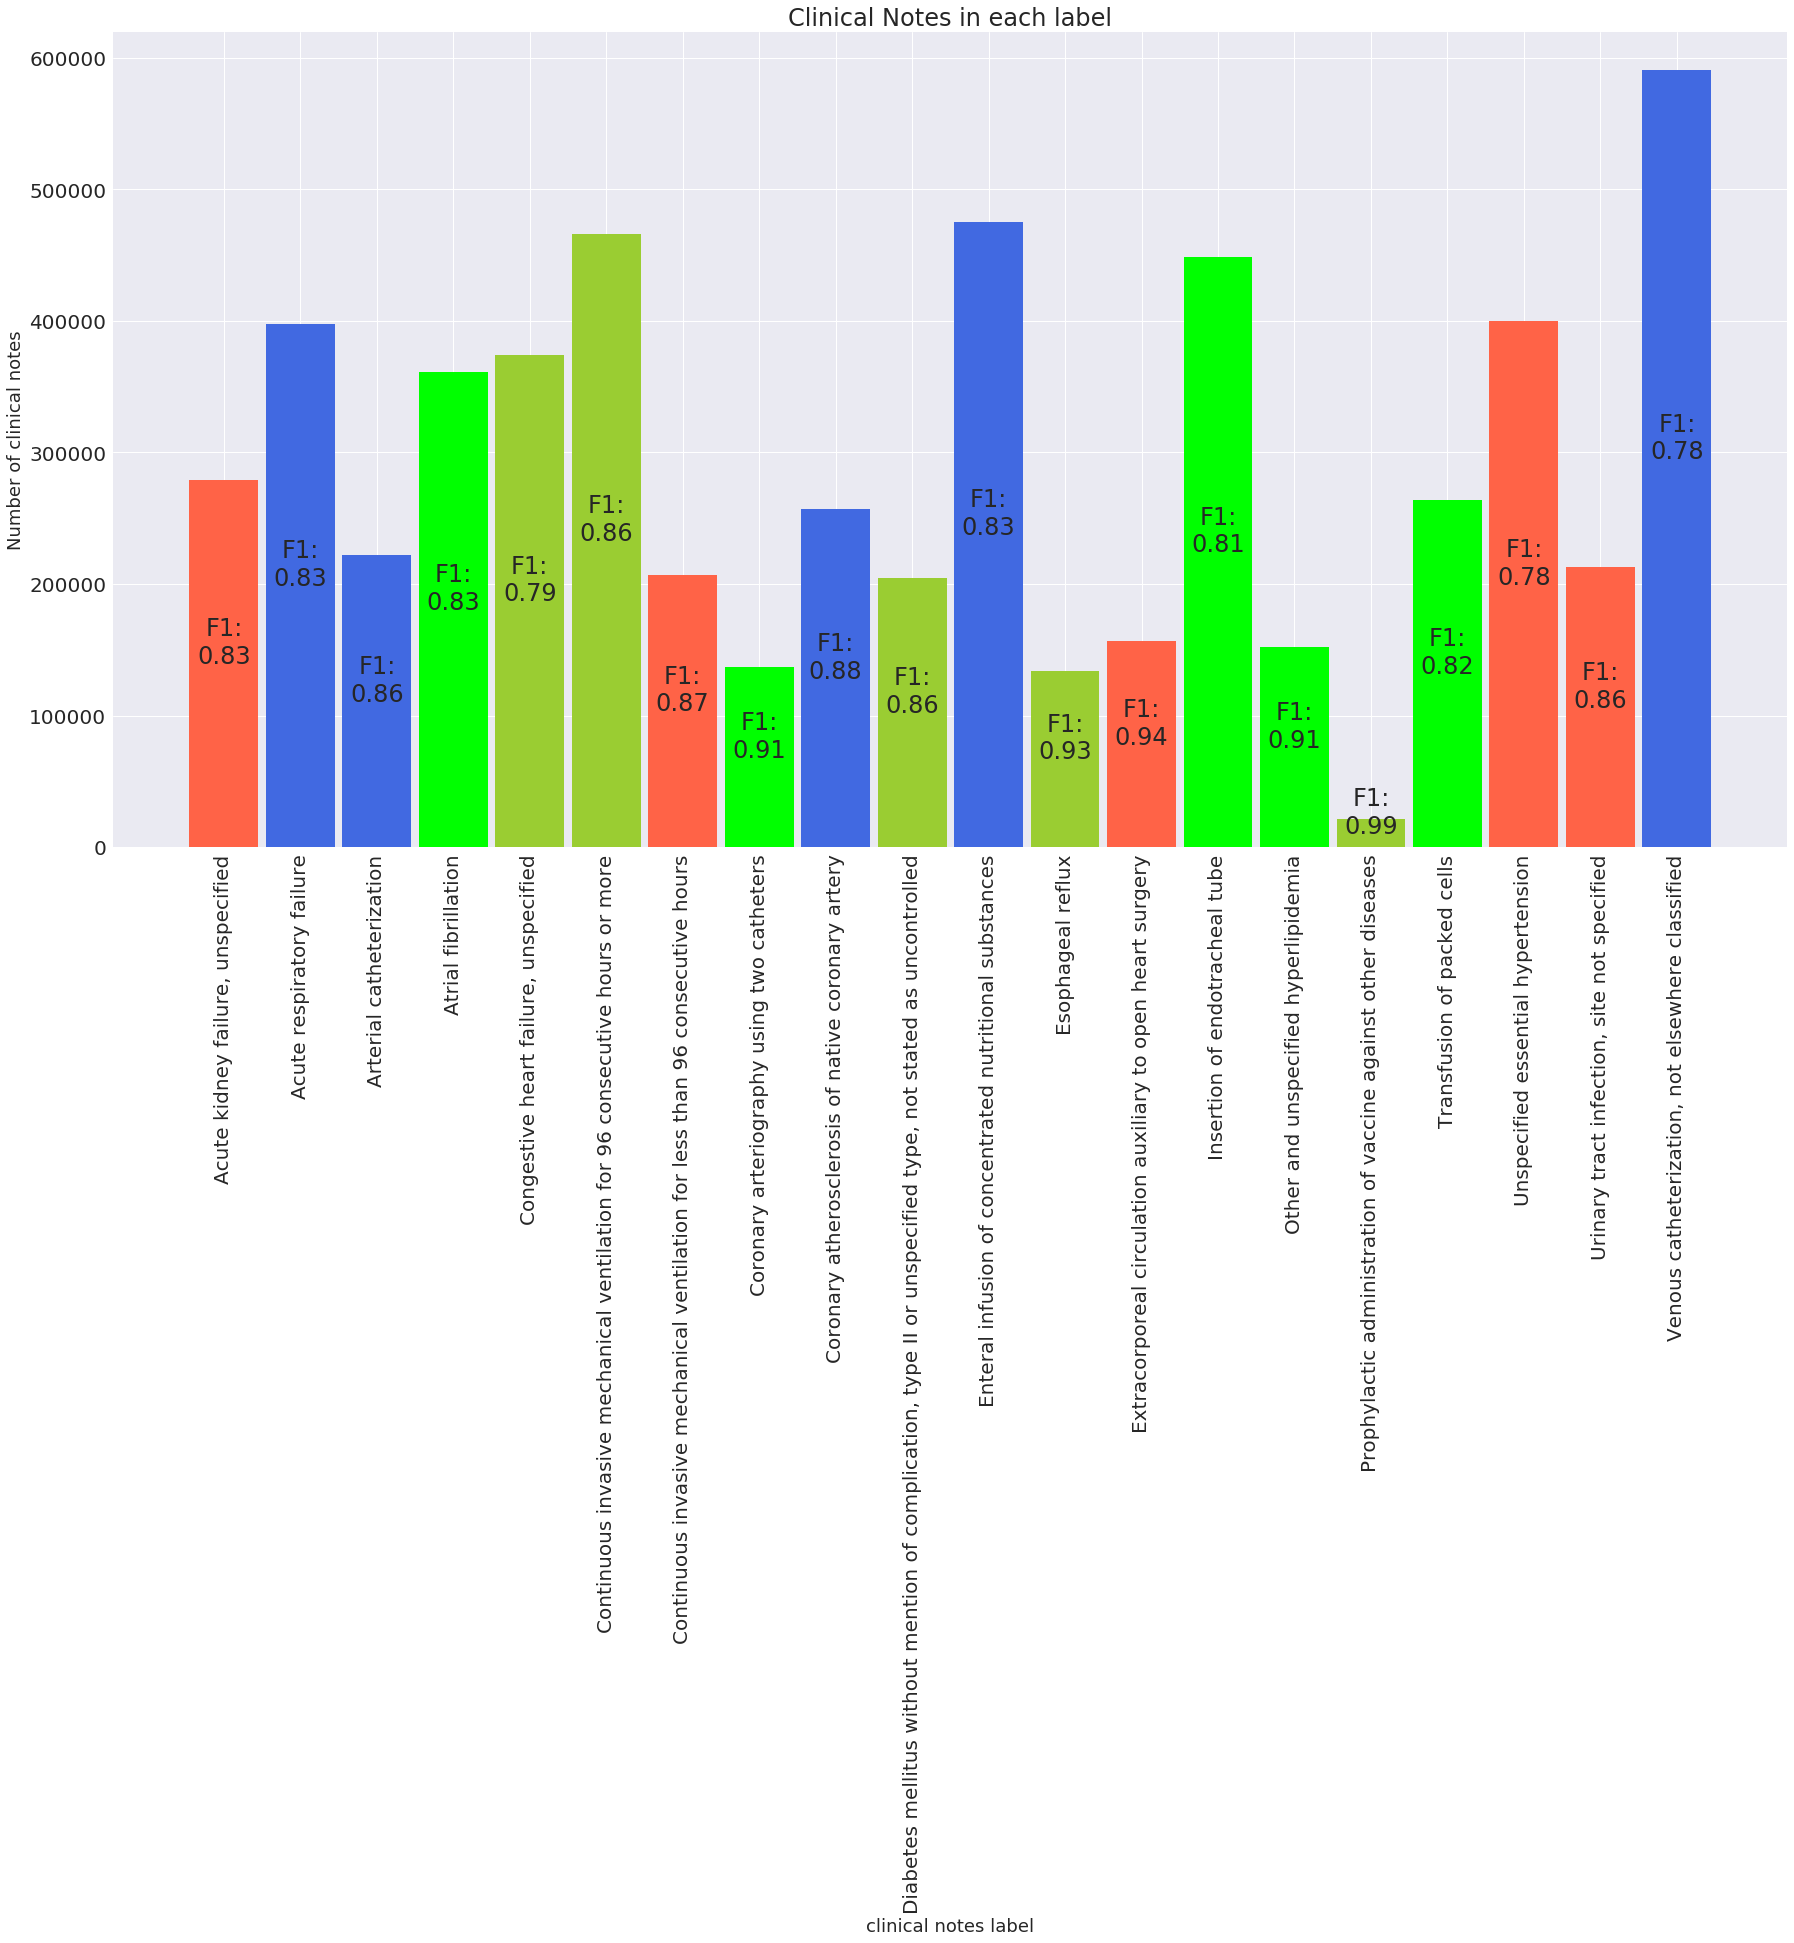

barplot shows huge imbalance among the labels in the dataset


In [277]:
import matplotlib as mpl
fig=plt.figure(figsize=(30,15))
ax = fig.add_subplot(111)
ax.bar(data_raw.columns[2:], data_raw.iloc[:,2:].sum().values,width=0.9,color=['tomato','yellowgreen','lime','royalblue'])
plt.xticks(rotation=90)
plt.title("Clinical Notes in each label", fontsize=24)
plt.ylabel('Number of clinical notes', fontsize=18)
plt.xlabel('clinical notes label', fontsize=18)
#adding the text labels
rects = ax.patches
a=30
patch_handles=[]
bars = [rects for rects in ax.get_children() if isinstance(rects, mpl.patches.Rectangle)]
for j in range(20):
    bl = bars[j].get_xy()
    x = 0.5*bars[j].get_width() + bl[0]
    y = 0.5*bars[j].get_height() + bl[1]
    ax.text(x,y, "F1:\n%g" % round(metrics.f1_score[j],2), ha='center',fontsize=24)

#labels = data_raw.iloc[:,2:].sum().values
plt.savefig('EDA_clinicalnotes')
plt.show()
print("barplot shows huge imbalance among the labels in the dataset")

In [35]:
print(data_raw.iloc[:,2:].sum().sort_values())

9955      21392
53081    134217
8856     136824
2724     151958
3961     156597
25000    204677
9671     206979
5990     212674
3891     221828
41401    257046
9904     264002
5849     279278
42731    361188
4280     374467
51881    397420
4019     399695
9604     448868
9672     466395
966      475174
3893     590468
dtype: int64


In [26]:
Mean_word_count1=pd.DataFrame.from_dict(Mean_word_count, orient='index')

In [27]:
Mean_word_count1.sort_values(by=[0], inplace=True)

In [28]:
Mean_word_count1.reset_index(inplace=True)

In [29]:
Mean_word_count1.sort_values(by=['index'], inplace=True)

In [30]:
Mean_word_count1.head()

,index,0
14,25000_diag,5.623677
17,2724_diag,5.663234
8,3891_proc,5.602614
4,3893_proc,5.596189
19,3961_proc,5.729182


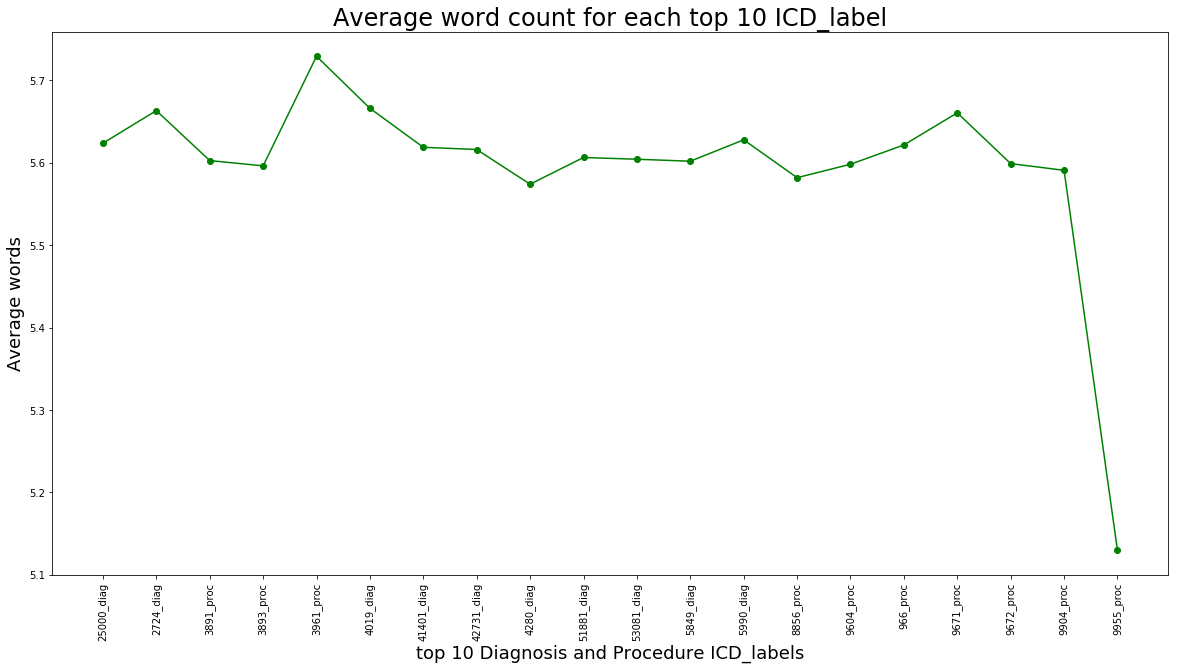

In [31]:
plt.figure(figsize=(20,10))
plt.plot(Mean_word_count1.iloc[:,0], Mean_word_count1.iloc[:,1],'go-') 
plt.xticks(rotation=90)
plt.title("Average word count for each top 10 ICD_label", fontsize=24)
plt.ylabel('Average words', fontsize=18)
plt.xlabel('top 10 Diagnosis and Procedure ICD_labels', fontsize=18)
plt.show()

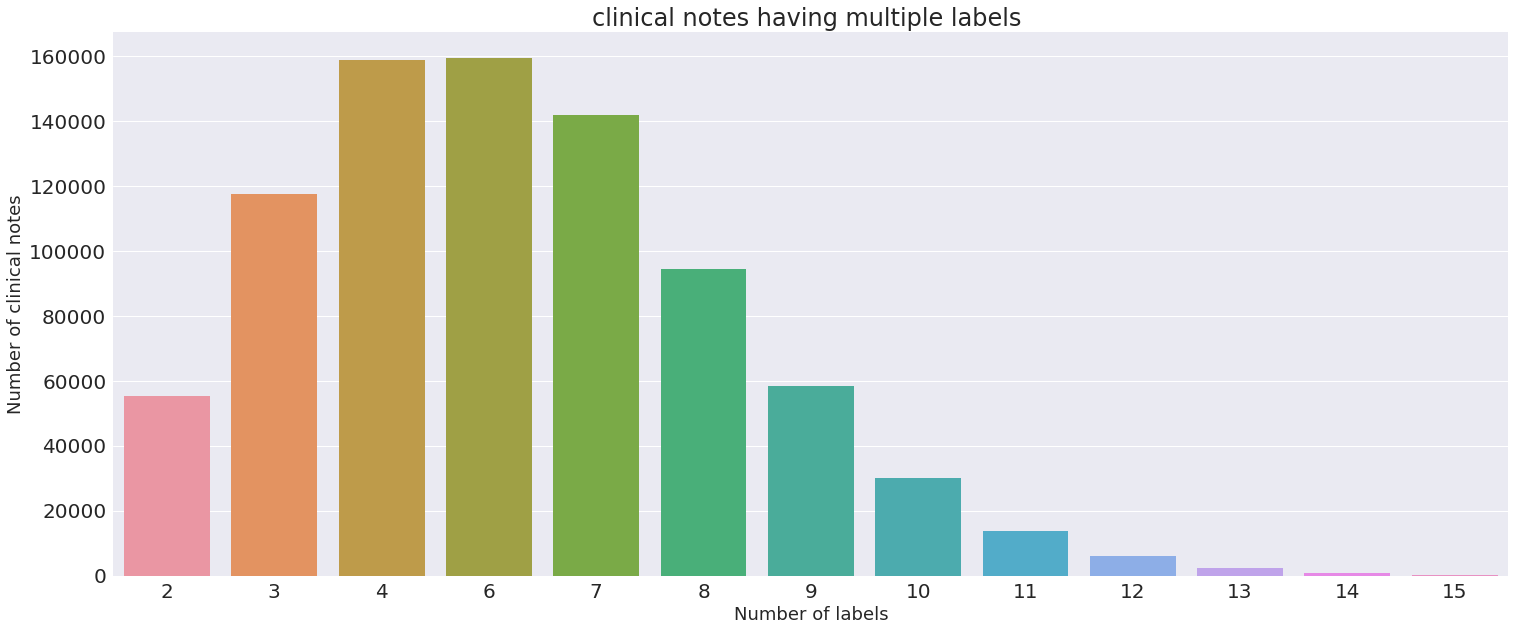

In [371]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(25,10))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("clinical notes having multiple labels ")
plt.ylabel('Number of clinical notes', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values

plt.show()

In [ ]:
metrics=pd.read_csv('./capstone/top10_eval_metrics1')

In [599]:
metrics.head()

,label,f1_score,precision,recall,roc_auc
0,4019_diag,0.776214,0.797672,0.787165,0.882108
1,4280_diag,0.791372,0.815333,0.803557,0.897643
2,42731_diag,0.825456,0.846885,0.835180,0.914428
3,41401_diag,0.877772,0.885848,0.885114,0.936381
4,5849_diag,0.829546,0.860111,0.847046,0.896947


In [600]:
metrics['concepts']=metrics['label']

In [601]:
metrics['concepts'] = metrics['label'].map({'25000_diag': 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled',
 '2724_diag': 'Other and unspecified hyperlipidemia',
 '4019_diag': 'Unspecified essential hypertension',
 '41401_diag': 'Coronary atherosclerosis of native coronary artery',
 '42731_diag': 'Atrial fibrillation',
 '4280_diag': 'Congestive heart failure, unspecified',
 '51881_diag': 'Acute respiratory failure',
 '53081_diag': 'Esophageal reflux',
 '5849_diag': 'Acute kidney failure, unspecified',
 '5990_diag': 'Urinary tract infection, site not specified',
 '3891_proc': 'Arterial catheterization',
 '3893_proc': 'Venous catheterization, not elsewhere classified',
 '3961_proc': 'Extracorporeal circulation auxiliary to open heart surgery',
 '8856_proc': 'Coronary arteriography using two catheters',
 '9604_proc': 'Insertion of endotracheal tube',
 '966_proc': 'Enteral infusion of concentrated nutritional substances',
 '9671_proc': 'Continuous invasive mechanical ventilation for less than 96 consecutive hours',
 '9672_proc': 'Continuous invasive mechanical ventilation for 96 consecutive hours or more',
 '9904_proc': 'Transfusion of packed cells',
 '9955_proc': 'Prophylactic administration of vaccine against other diseases'})

In [604]:
metrics.to_csv('top10_diag_proc_metrics')

In [ ]:
 ################### EDA FOR TOP 50 DIAGNOSIS AND PROCEDURES ######################

In [410]:
metrics=pd.read_csv('./capstone1/top50_eval_metrics1')

In [448]:
metrics.head()

,label,f1_score,precision,recall,roc_auc
0,4019_diag,0.789702,0.812763,0.812012,0.886219
1,4280_diag,0.820775,0.837845,0.838082,0.906661
2,42731_diag,0.852071,0.866832,0.864825,0.923390
3,41401_diag,0.897428,0.903103,0.906049,0.937965
4,5849_diag,0.844819,0.868097,0.867602,0.894319


In [473]:
data_raw = pd.read_csv("./capstone1/top50_multi_diag_proc")
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**top50 data:**")
data_raw.head()

Number of rows in data = 1555388
Number of columns in data = 102


**top50 data:**


,HADM_ID,TEXT,4019_diag,4280_diag,42731_diag,41401_diag,5849_diag,25000_diag,2724_diag,51881_diag,...,17_proc,45_proc,3611_proc,8853_proc,3891_proc,3322_proc,3404_proc,3761_proc,8855_proc,3491_proc
0,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,167853,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,167853,PATIENT/TEST INFORMATION:\nIndication: Endocar...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,167853,Atrial fibrillation with a slow ventricular re...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [474]:
categories=list(data_raw.columns)
categories=categories[2:]

In [524]:
data_raw.columns

Index(['HADM_ID', 'TEXT', '4019_diag', '4280_diag', '42731_diag', '41401_diag',
       '5849_diag', '25000_diag', '2724_diag', '51881_diag',
       ...
       '17_proc', '45_proc', '3611_proc', '8853_proc', '3891_proc',
       '3322_proc', '3404_proc', '3761_proc', '8855_proc', '3491_proc'],
      dtype='object', length=102)

In [510]:
diag_cat=categories[0:50]
len(diag_cat)

50

In [511]:
print(diag_cat)

['4019_diag', '4280_diag', '42731_diag', '41401_diag', '5849_diag', '25000_diag', '2724_diag', '51881_diag', '5990_diag', '53081_diag', '2720_diag', 'V053_diag', 'V290_diag', '2859_diag', '2449_diag', '486_diag', '2851_diag', '2762_diag', '496_diag', '99592_diag', 'V5861_diag', '0389_diag', '5070_diag', 'V3000_diag', '5859_diag', '311_diag', '40390_diag', '3051_diag', '412_diag', '2875_diag', 'V4581_diag', '41071_diag', '2761_diag', '4240_diag', 'V1582_diag', 'V3001_diag', '5119_diag', 'V4582_diag', '40391_diag', '78552_diag', '4241_diag', 'V5867_diag', '42789_diag', '32723_diag', '9971_diag', '5845_diag', '2760_diag', '7742_diag', '49390_diag', '2767_diag']


In [476]:
for i in range(len(diag_cat)):
    diag_cat[i]=diag_cat[i][:-5]

In [477]:
proc_cat=categories[50:]

In [492]:
len(proc_cat)

50

In [478]:
for i in range(len(proc_cat)):
    proc_cat[i]=proc_cat[i][:-5]

In [479]:
# Filter out admission id and text columns of only top10 diagnosis
top50_concepts=concepts.loc[concepts['ICD9_CODE'].isin(diag_cat)]
top50_concepts=top50_concepts[['ICD9_CODE','SHORT_TITLE']]
print(len(top50_concepts.ICD9_CODE.unique()))

50


In [480]:
# Filter out admission id and text columns of only top10 diagnosis
top50_proc_concepts=proc_concepts.loc[proc_concepts['ICD9_CODE'].isin(proc_cat)]
top50_proc_concepts=top50_proc_concepts[['ICD9_CODE','SHORT_TITLE']]
top50_proc_concepts['ICD9_CODE'] = top50_proc_concepts['ICD9_CODE'].astype(str)

In [500]:
top50_proc_concepts.drop([105, 505], inplace=True)

In [517]:
top50_proc_concepts.loc[60:60,'ICD9_CODE':'SHORT_TITLE']='3601','Under intravenous inj and intro'

In [519]:
len(top50_proc_concepts)

50

In [481]:
concepts[concepts.ICD9_CODE=='2762']

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
2430,2787,2762,Acidosis,Acidosis


In [520]:
myprocdict={}
for i in range(len(top50_proc_concepts)):
    myprocdict[top50_proc_concepts.iloc[i,0]]=top50_proc_concepts.iloc[i,1]
myprocdict

{'17': 'Infusion of vasopressor',
 '311': 'Temporary tracheostomy',
 '331': 'Spinal tap',
 '3322': 'Fiber-optic bronchoscopy',
 '3323': 'Other bronchoscopy',
 '3324': 'Closed bronchial biopsy',
 '3404': 'Insert intercostal cath',
 '3491': 'Thoracentesis',
 '3521': 'Opn/oth rep aort vlv-tis',
 '3601': 'Under intravenous inj and intro',
 '3606': 'Ins nondrug elut cor st',
 '3607': 'Ins drug-elut coronry st',
 '3611': 'Aortocor bypas-1 cor art',
 '3612': 'Aortocor bypas-2 cor art',
 '3613': 'Aortocor bypas-3 cor art',
 '3615': '1 int mam-cor art bypass',
 '3722': 'Left heart cardiac cath',
 '3723': 'Rt/left heart card cath',
 '3761': 'Pulsation balloon implan',
 '3891': 'Arterial catheterization',
 '3893': 'Venous cath NEC',
 '3895': 'Ven cath renal dialysis',
 '3897': 'CV cath plcmt w guidance',
 '3961': 'Extracorporeal circulat',
 '3995': 'Hemodialysis',
 '40': 'Procedure-one vessel',
 '4311': 'Percu endosc gastrostomy',
 '45': 'Insert 1 vascular stent',
 '4513': 'Sm bowel endoscopy NEC

In [521]:
mydict={}
for i in range(len(top50_concepts)):
    mydict[top50_concepts.iloc[i,0]]=top50_concepts.iloc[i,1]
mydict

{'0389': 'Septicemia NOS',
 '2449': 'Hypothyroidism NOS',
 '25000': 'DMII wo cmp nt st uncntr',
 '2720': 'Pure hypercholesterolem',
 '2724': 'Hyperlipidemia NEC/NOS',
 '2760': 'Hyperosmolality',
 '2761': 'Hyposmolality',
 '2762': 'Acidosis',
 '2767': 'Hyperpotassemia',
 '2851': 'Ac posthemorrhag anemia',
 '2859': 'Anemia NOS',
 '2875': 'Thrombocytopenia NOS',
 '3051': 'Tobacco use disorder',
 '311': 'Depressive disorder NEC',
 '32723': 'Obstructive sleep apnea',
 '4019': 'Hypertension NOS',
 '40390': 'Hy kid NOS w cr kid I-IV',
 '40391': 'Hyp kid NOS w cr kid V',
 '41071': 'Subendo infarct, initial',
 '412': 'Old myocardial infarct',
 '41401': 'Crnry athrscl natve vssl',
 '4240': 'Mitral valve disorder',
 '4241': 'Aortic valve disorder',
 '42731': 'Atrial fibrillation',
 '42789': 'Cardiac dysrhythmias NEC',
 '4280': 'CHF NOS',
 '486': 'Pneumonia, organism NOS',
 '49390': 'Asthma NOS',
 '496': 'Chr airway obstruct NEC',
 '5070': 'Food/vomit pneumonitis',
 '5119': 'Pleural effusion NOS',

In [522]:
mydict={f'{k}_diag': v for k, v in mydict.items()}
print(mydict)

{'0389_diag': 'Septicemia NOS', '25000_diag': 'DMII wo cmp nt st uncntr', '2449_diag': 'Hypothyroidism NOS', '2720_diag': 'Pure hypercholesterolem', '2724_diag': 'Hyperlipidemia NEC/NOS', '2760_diag': 'Hyperosmolality', '2761_diag': 'Hyposmolality', '2762_diag': 'Acidosis', '2767_diag': 'Hyperpotassemia', '3051_diag': 'Tobacco use disorder', '311_diag': 'Depressive disorder NEC', '32723_diag': 'Obstructive sleep apnea', '2851_diag': 'Ac posthemorrhag anemia', '2859_diag': 'Anemia NOS', '2875_diag': 'Thrombocytopenia NOS', '4019_diag': 'Hypertension NOS', '40390_diag': 'Hy kid NOS w cr kid I-IV', '40391_diag': 'Hyp kid NOS w cr kid V', '41071_diag': 'Subendo infarct, initial', '412_diag': 'Old myocardial infarct', '41401_diag': 'Crnry athrscl natve vssl', '4240_diag': 'Mitral valve disorder', '4241_diag': 'Aortic valve disorder', '42731_diag': 'Atrial fibrillation', '42789_diag': 'Cardiac dysrhythmias NEC', '4280_diag': 'CHF NOS', '486_diag': 'Pneumonia, organism NOS', '49390_diag': 'As

In [523]:
myprocdict={f'{k}_proc': v for k, v in myprocdict.items()}
print(myprocdict)

{'3601_proc': 'Under intravenous inj and intro', '66_proc': 'PTCA', '17_proc': 'Infusion of vasopressor', '40_proc': 'Procedure-one vessel', '45_proc': 'Insert 1 vascular stent', '331_proc': 'Spinal tap', '311_proc': 'Temporary tracheostomy', '3606_proc': 'Ins nondrug elut cor st', '3607_proc': 'Ins drug-elut coronry st', '3611_proc': 'Aortocor bypas-1 cor art', '3612_proc': 'Aortocor bypas-2 cor art', '3613_proc': 'Aortocor bypas-3 cor art', '3615_proc': '1 int mam-cor art bypass', '3961_proc': 'Extracorporeal circulat', '3891_proc': 'Arterial catheterization', '3893_proc': 'Venous cath NEC', '3895_proc': 'Ven cath renal dialysis', '3897_proc': 'CV cath plcmt w guidance', '3722_proc': 'Left heart cardiac cath', '3723_proc': 'Rt/left heart card cath', '3322_proc': 'Fiber-optic bronchoscopy', '3323_proc': 'Other bronchoscopy', '3324_proc': 'Closed bronchial biopsy', '3404_proc': 'Insert intercostal cath', '3491_proc': 'Thoracentesis', '3521_proc': 'Opn/oth rep aort vlv-tis', '5491_proc'

In [525]:
data_raw.rename(mydict,axis=1, inplace=True)
data_raw.head(1)

,HADM_ID,TEXT,Hypertension NOS,CHF NOS,Atrial fibrillation,Crnry athrscl natve vssl,Acute kidney failure NOS,DMII wo cmp nt st uncntr,Hyperlipidemia NEC/NOS,Acute respiratry failure,...,17_proc,45_proc,3611_proc,8853_proc,3891_proc,3322_proc,3404_proc,3761_proc,8855_proc,3491_proc
0,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [526]:
data_raw.rename(myprocdict,axis=1, inplace=True)
data_raw.head(1)

,HADM_ID,TEXT,Hypertension NOS,CHF NOS,Atrial fibrillation,Crnry athrscl natve vssl,Acute kidney failure NOS,DMII wo cmp nt st uncntr,Hyperlipidemia NEC/NOS,Acute respiratry failure,...,Infusion of vasopressor,Insert 1 vascular stent,Aortocor bypas-1 cor art,Lt heart angiocardiogram,Arterial catheterization,Fiber-optic bronchoscopy,Insert intercostal cath,Pulsation balloon implan,Coronar arteriogr-1 cath,Thoracentesis
0,167853,Admission Date: [**2151-7-16**] Dischar...,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [584]:
metrics=pd.read_csv('./capstone1/top50_eval_metrics1')

In [529]:
mydict.update(myprocdict)

In [585]:
len(mydict)

100

In [586]:
metrics['label'] = metrics['label'].map(mydict)

In [582]:
metrics['concepts']=metrics['label'].map(mydict)

In [587]:
metrics.head()

,label,f1_score,precision,recall,roc_auc
0,Hypertension NOS,0.789702,0.812763,0.812012,0.886219
1,CHF NOS,0.820775,0.837845,0.838082,0.906661
2,Atrial fibrillation,0.852071,0.866832,0.864825,0.923390
3,Crnry athrscl natve vssl,0.897428,0.903103,0.906049,0.937965
4,Acute kidney failure NOS,0.844819,0.868097,0.867602,0.894319


In [541]:
data_raw.iloc[:,52:].head()

,Packed cell transfusion,Venous cath NEC,Non-invasive mech vent,Aortocor bypas-3 cor art,1 int mam-cor art bypass,Extracorporeal circulat,Insert endotracheal tube,Entral infus nutrit sub,Cont inv mec ven 96+ hrs,Temporary tracheostomy,...,Infusion of vasopressor,Insert 1 vascular stent,Aortocor bypas-1 cor art,Lt heart angiocardiogram,Arterial catheterization,Fiber-optic bronchoscopy,Insert intercostal cath,Pulsation balloon implan,Coronar arteriogr-1 cath,Thoracentesis
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


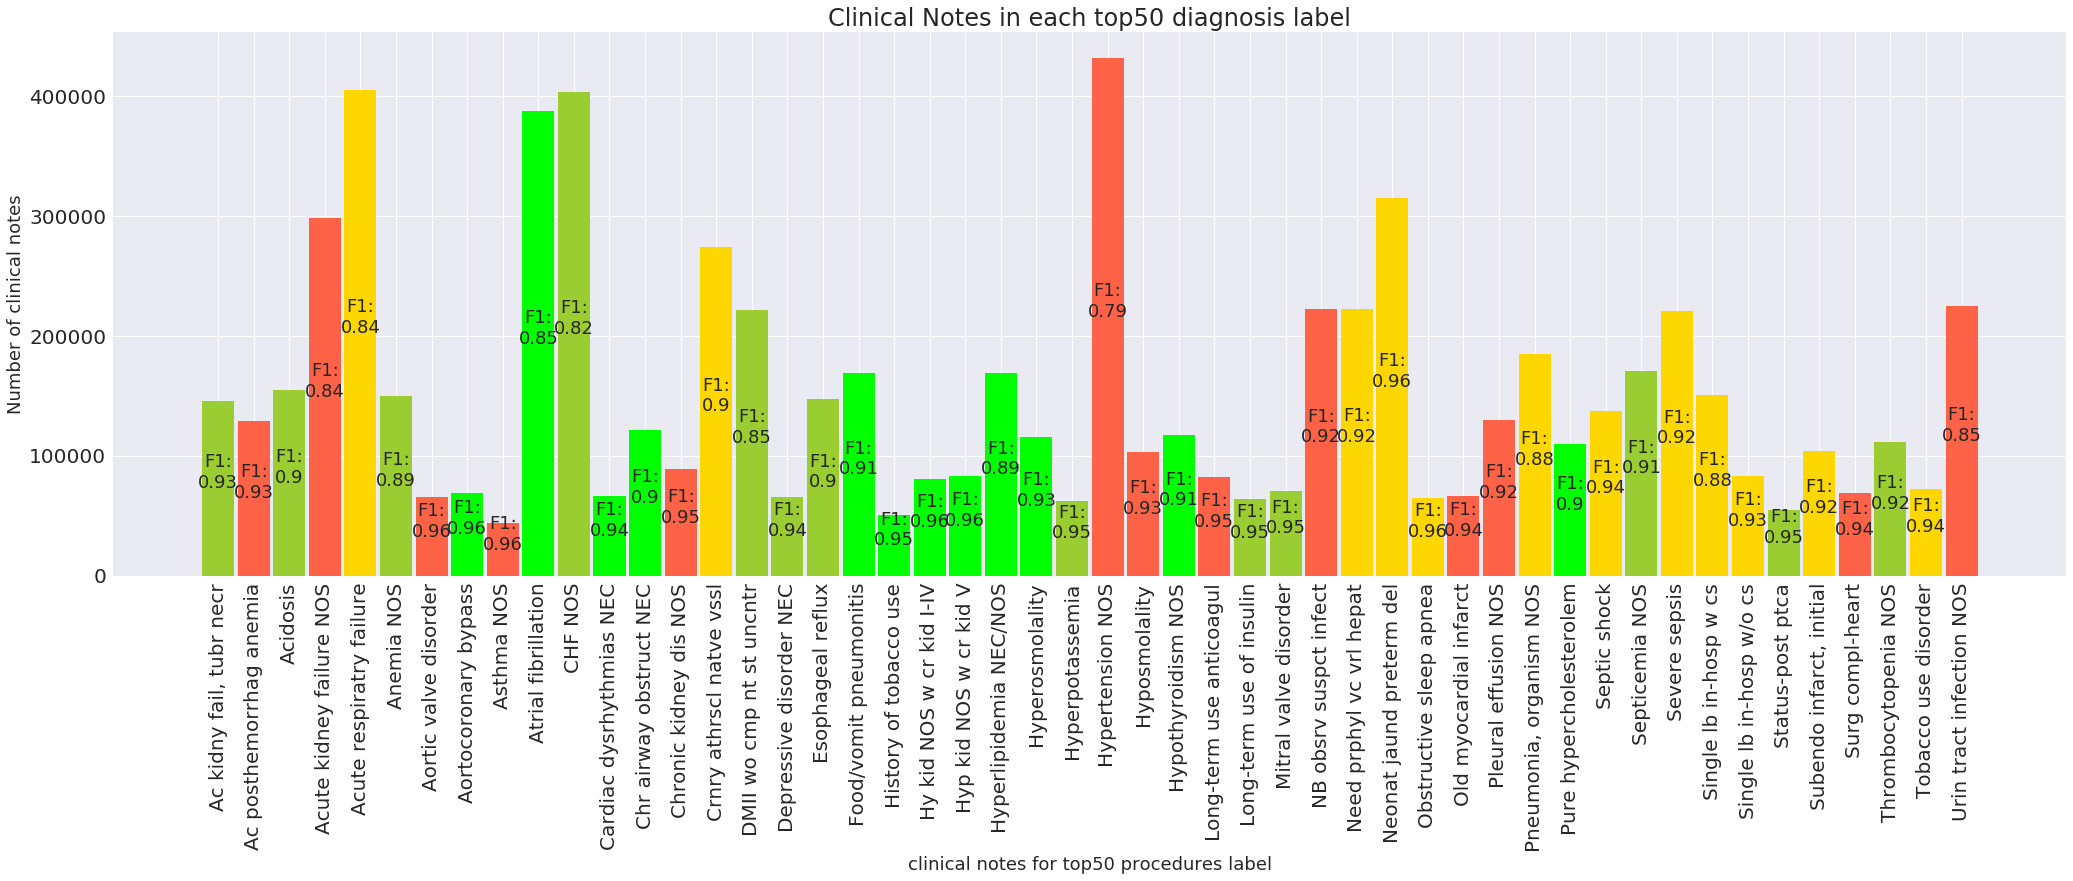

Barplot shows huge imbalance among the labels in the dataset


In [565]:

import matplotlib as mpl
fig=plt.figure(figsize=(35,10))
ax = fig.add_subplot(111)
ax.bar(data_raw.columns[2:52], data_raw.iloc[:,2:52].sum().values,width=0.9,color=['tomato','yellowgreen','lime','gold'])
plt.xticks(rotation=90)
plt.title("Clinical Notes in each top50 diagnosis label", fontsize=24)
plt.ylabel('Number of clinical notes', fontsize=18)
plt.xlabel('clinical notes for top50 procedures label', fontsize=18)
#adding the text labels
rects = ax.patches
a=30
patch_handles=[]
bars = [rects for rects in ax.get_children() if isinstance(rects, mpl.patches.Rectangle)]
for j in range(50):
    bl = bars[j].get_xy()
    x = 0.5*bars[j].get_width() + bl[0]
    y = 0.5*bars[j].get_height() + bl[1]
    ax.text(x,y, "F1:\n%g" % round(metrics.f1_score[j],2), ha='center',fontsize=18)

#labels = data_raw.iloc[:,2:].sum().values
plt.savefig('EDA_clinicalnotes_top50diag')
plt.show()
print("Barplot shows huge imbalance among the labels in the dataset")

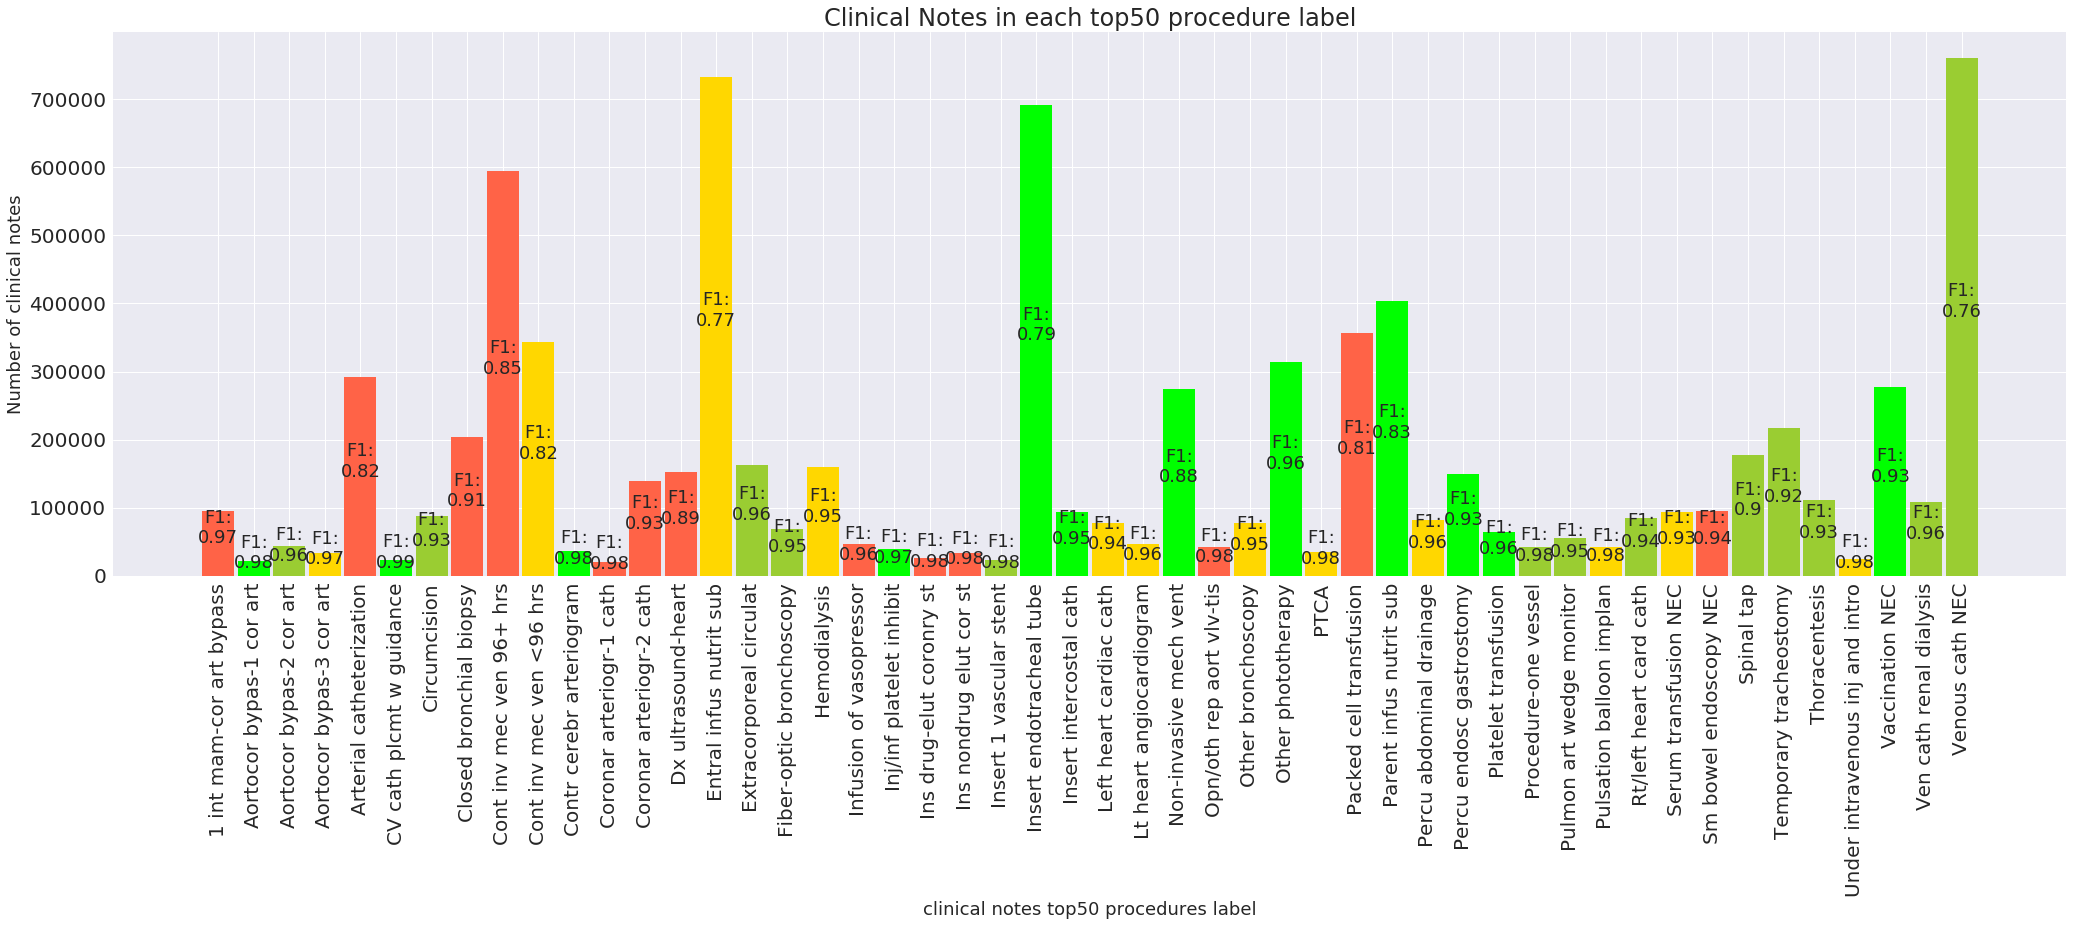

Barplot shows huge imbalance among the labels in the dataset


In [564]:

import matplotlib as mpl
fig=plt.figure(figsize=(35,10))
ax = fig.add_subplot(111)
ax.bar(data_raw.columns[52:], data_raw.iloc[:,52:].sum().values,width=0.9,color=['tomato','yellowgreen','lime','gold'])
plt.xticks(rotation=90)
plt.title("Clinical Notes in each top50 procedure label", fontsize=24)
plt.ylabel('Number of clinical notes', fontsize=18)
plt.xlabel('clinical notes top50 procedures label', fontsize=18)
#adding the text labels
rects = ax.patches
a=30
patch_handles=[]
bars = [rects for rects in ax.get_children() if isinstance(rects, mpl.patches.Rectangle)]
for j in range(50):
    bl = bars[j].get_xy()
    x = 0.5*bars[j].get_width() + bl[0]
    y = 0.5*bars[j].get_height() + bl[1]
    ax.text(x,y, "F1:\n%g" % round(metrics.f1_score[j+50],2), ha='center',fontsize=18)

#labels = data_raw.iloc[:,2:].sum().values
plt.savefig('EDA_clinicalnotes_top50proc')
plt.show()
print("Barplot shows huge imbalance among the labels in the dataset")

In [552]:
print(data_raw.iloc[:,2:].sum().sort_values())

Coronar arteriogr-1 cath            20185
Aortocor bypas-1 cor art            21976
Insert 1 vascular stent             23638
CV cath plcmt w guidance            23777
Under intravenous inj and intro     24072
Ins drug-elut coronry st            26652
Aortocor bypas-3 cor art            33382
Ins nondrug elut cor st             33768
PTCA                                35482
Contr cerebr arteriogram            35988
Inj/inf platelet inhibit            38793
Opn/oth rep aort vlv-tis            41844
Pulsation balloon implan            42401
Procedure-one vessel                43016
Aortocor bypas-2 cor art            43393
Asthma NOS                          43838
Lt heart angiocardiogram            46104
Infusion of vasopressor             46116
History of tobacco use              50646
Status-post ptca                    55039
Pulmon art wedge monitor            55920
Hyperpotassemia                     62400
Long-term use of insulin            63756
Platelet transfusion              

In [555]:
Mean_word_count1=dict()
num_words1=dict()
a,b=0,0
for x in range(2,102,1):
    a,b=0,0
    for i in range(len(data_raw)):
        m,n=0,0
        if data_raw.iloc[i,x]==1:
            m,n=sum_word(data_raw.loc[i,'TEXT'])
            a=a+m
            b=b+n
    Mean_word_count1[categories[x-2]]= a/b
    num_words1[categories[x-2]]=b
    print(x)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


In [556]:
Mean_word_count2=pd.DataFrame.from_dict(Mean_word_count1, orient='index')

In [557]:
Mean_word_count2.sort_values(by=[0], inplace=True)

In [558]:
Mean_word_count2.reset_index(inplace=True)

In [559]:
Mean_word_count2.sort_values(by=['index'], inplace=True)

In [560]:
Mean_word_count2.head()

,index,0
42,0389_diag,5.605372
23,17_proc,5.564289
60,2449_diag,5.618965
62,25000_diag,5.624584
79,2720_diag,5.649186


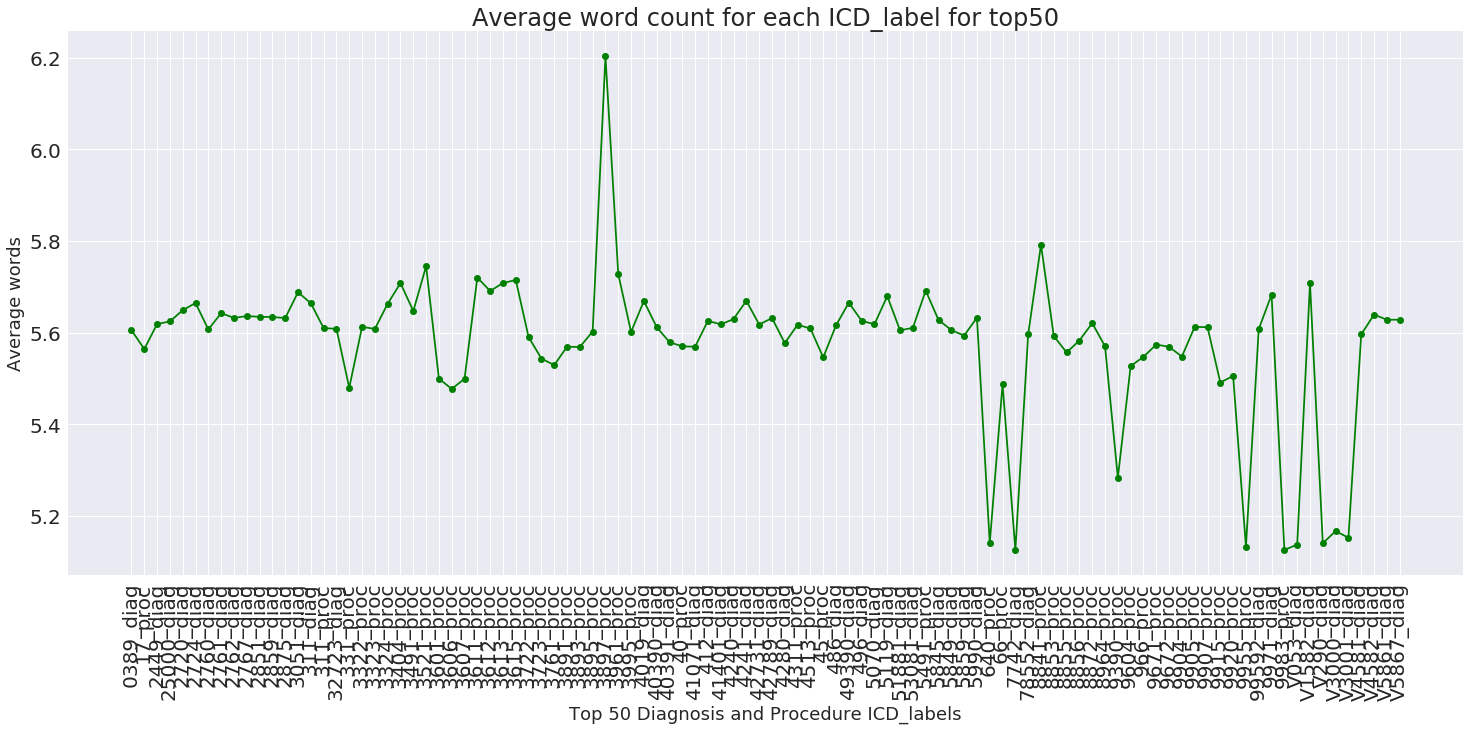

In [563]:
plt.figure(figsize=(25,10))
plt.plot(Mean_word_count2.iloc[:,0], Mean_word_count2.iloc[:,1],'go-') 
plt.xticks(rotation=90)
plt.title("Average word count for each ICD_label for top50", fontsize=24)
plt.ylabel('Average words', fontsize=18)
plt.xlabel('Top 50 Diagnosis and Procedure ICD_labels', fontsize=18)
plt.show()

In [589]:
metrics=pd.read_csv('./capstone1/top50_eval_metrics1')


In [590]:
metrics['concepts']=metrics['label']

In [591]:
metrics['concepts']=metrics['label'].map(mydict)

In [593]:
metrics.to_csv('top50_diag_proc_metrics')